In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

In [ ]:
# Unduh stopwords (jika belum)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Membaca dataset
data = pd.read_excel('calon1.xlsx')  # File input
data.columns = ['full_text', 'sentimen']

In [ ]:
print(data.head())

                                           full_text sentimen
0  @RTPVX_ @ridwankamil Abdi juga dulu dukung Kan...  negatif
1  @RTPVX_ @ridwankamil Ya Allah kang Emil kok gi...  negatif
2  @RTPVX_ @ridwankamil Kang Emil kenapa jadi gini..  negatif
3  Kang Emil gimana rasanya setelah makan goreng ...  negatif
4  @officialinews_ @RTPVX_ @ridwankamil Kl h sala...  negatif


In [ ]:
# Inisialisasi Stopwords dan Stemmer
stop_words = set(stopwords.words('indonesian'))
ps = PorterStemmer()

In [ ]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    text = re.sub(r'@\w+', '', text)  # Hapus mention
    text = re.sub(r'http\S+|www\S+', '', text)  # Hapus URL
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = text.lower()  # Ubah ke huruf kecil
    return text

In [ ]:
# Fungsi untuk stemming dan menghapus stopwords
def preprocess_text(text):
    text = clean_text(text)
    text = " ".join([ps.stem(word) for word in text.split() if word not in stop_words])  # Stemming dan hapus stopwords
    return text

In [ ]:
# Preprocessing data
data['cleaned_text'] = data['full_text'].apply(preprocess_text)

In [ ]:
print(data.head())

                                           full_text sentimen  \
0  @RTPVX_ @ridwankamil Abdi juga dulu dukung Kan...  negatif   
1  @RTPVX_ @ridwankamil Ya Allah kang Emil kok gi...  negatif   
2  @RTPVX_ @ridwankamil Kang Emil kenapa jadi gini..  negatif   
3  Kang Emil gimana rasanya setelah makan goreng ...  negatif   
4  @officialinews_ @RTPVX_ @ridwankamil Kl h sala...  negatif   

                                        cleaned_text  
0     abdi dukung kang emil biar maju capr untunglah  
1             ya allah kang emil gini atuh mah parah  
2                                     kang emil gini  
3  kang emil gimana makan goreng jukut bu ima mem...  
4  kl h salah knp diperiksa kang emil jd bodoh ya...  


In [ ]:
# Memisahkan fitur (teks) dan label (sentimen)
X = data['cleaned_text']
y = data['sentimen']

In [ ]:
# Vectorisasi menggunakan TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [ ]:
# Model 1: Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

In [ ]:
# Evaluasi Naive Bayes
print("=== Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))

=== Naive Bayes ===
Accuracy: 0.7043478260869566
              precision    recall  f1-score   support

     negatif       0.69      1.00      0.82        76
     positif       1.00      0.13      0.23        39

    accuracy                           0.70       115
   macro avg       0.85      0.56      0.52       115
weighted avg       0.80      0.70      0.62       115



In [ ]:
# Model 2: Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [ ]:
# Evaluasi SVM
print("\n=== Support Vector Machine (SVM) ===")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))


=== Support Vector Machine (SVM) ===
Accuracy: 0.7739130434782608
              precision    recall  f1-score   support

     negatif       0.76      0.97      0.85        76
     positif       0.88      0.38      0.54        39

    accuracy                           0.77       115
   macro avg       0.82      0.68      0.69       115
weighted avg       0.80      0.77      0.74       115



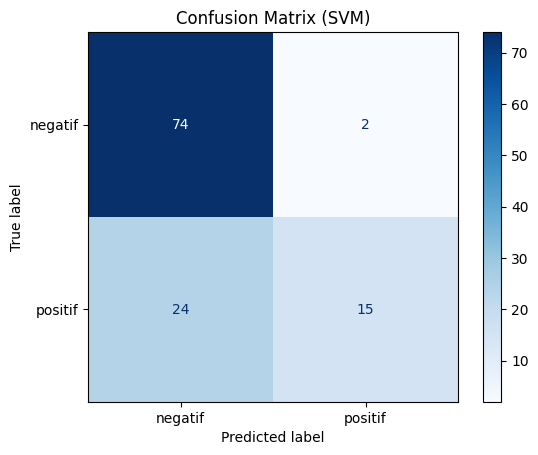

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# === Confusion Matrix ===
cm = confusion_matrix(y_test, svm_predictions, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (SVM)')
plt.show()

In [ ]:
# === Kata Kunci Berdasarkan Label ===
def get_top_keywords(label, model, vectorizer, X, y, top_n=20):
    idx = y[y == label].index
    word_freq = pd.DataFrame({
        'word': vectorizer.get_feature_names_out(),
        'frequency': X[idx].sum(axis=0).A1
    })
    return word_freq.sort_values(by='frequency', ascending=False).head(top_n)

print("\n=== Kata Kunci Paling Sering Muncul ===")
print("Positif:")
print(get_top_keywords('positif', svm_model, vectorizer, X_vectorized, y))
print("\nNegatif:")
print(get_top_keywords('negatif', svm_model, vectorizer, X_vectorized, y))


=== Kata Kunci Paling Sering Muncul ===
Positif:
           word  frequency
1986     ridwan  11.890141
982       kamil  10.880580
631      dukung   7.854663
2208    suswono   7.715239
1995         rk   7.260055
990        kang   6.708138
897     jakarta   6.265193
655        emil   5.915233
687         for   5.902636
601         dkj   5.572367
1220  lanjutkan   4.004127
2471         yg   3.910691
1855    pilkada   3.616014
1984       rido   3.615121
1914      projo   3.509216
1282       maju   3.352917
31          aja   3.343253
2092     semoga   3.292266
600         dki   3.033538
1851      pilih   3.001303

Negatif:
         word  frequency
2208  suswono  15.366187
2471       yg  10.395818
990      kang  10.174621
982     kamil   9.487769
897   jakarta   9.208688
1986   ridwan   8.968392
655      emil   8.189281
2459       ya   8.143592
701       gak   7.821758
31        aja   7.561998
1532     nabi   7.003993
1679    orang   6.452776
693        ga   6.358667
155   bandung   5.61995

In [ ]:
def get_keyword_confidence(model, vectorizer, top_n=20):
    """
    Menghitung confidence kata untuk label positif dan negatif.
    Confidence didasarkan pada koefisien model SVM.
    """
    # Ambil koefisien model
    if hasattr(model, 'coef_'):
        coefficients = model.coef_.toarray()[0]  # Koefisien untuk SVM linear
    else:
        raise ValueError("Model tidak mendukung akses koefisien.")

    # Ambil daftar kata
    words = vectorizer.get_feature_names_out()

    # Gabungkan kata dengan koefisiennya
    word_confidence = pd.DataFrame({
        'word': words,
        'confidence': coefficients
    })

    # Pisahkan ke positif dan negatif
    top_positive = word_confidence.sort_values(by='confidence', ascending=False).head(top_n)
    top_negative = word_confidence.sort_values(by='confidence', ascending=True).head(top_n)

    return top_positive, top_negative


# Ambil confidence untuk kata positif dan negatif
top_positive_confidence, top_negative_confidence = get_keyword_confidence(svm_model, vectorizer)

print("\n=== Kata dengan Confidence Tertinggi (Positif) ===")
print(top_positive_confidence)

print("\n=== Kata dengan Confidence Tertinggi (Negatif) ===")
print(top_negative_confidence)



=== Kata dengan Confidence Tertinggi (Positif) ===
            word  confidence
1986      ridwan    1.871901
2087    semangat    1.793622
687          for    1.361628
749       golkar    1.312730
600          dki    1.310992
245   berinovasi    1.226276
2072       sehat    1.189967
631       dukung    1.163180
1377      menang    1.146900
601          dkj    1.137896
982        kamil    1.107676
1392   mendingan    1.096934
1395   mendukung    1.079818
1984        rido    1.067377
1914       projo    1.010482
1921         psi    0.975747
1459    menyebut    0.955292
1855     pilkada    0.949239
1802       penuh    0.910584
641       effect    0.908582

=== Kata dengan Confidence Tertinggi (Negatif) ===
             word  confidence
701           gak   -1.223350
972         kalah   -1.142349
1503      mokondo   -0.862599
1276          mah   -0.860732
2333        tolol   -0.801098
811          heru   -0.760344
1793      penista   -0.758219
175         bantu   -0.703726
442   darimananya

In [ ]:
# === Prediksi Tweet Baru ===
def predict_new_tweet(tweet, vectorizer, model):
    processed_tweet = preprocess_text(tweet)
    tweet_vectorized = vectorizer.transform([processed_tweet])
    prediction = model.predict(tweet_vectorized)[0]
    return prediction

In [ ]:
# Input user untuk tweet baru
new_tweet = input("\nMasukkan tweet baru untuk prediksi: ")
sentiment = predict_new_tweet(new_tweet, vectorizer, svm_model)
print(f"Prediksi sentimen untuk tweet: '{new_tweet}' adalah: {sentiment}")


Masukkan tweet baru untuk prediksi: gak jelas
Prediksi sentimen untuk tweet: 'gak jelas' adalah: negatif


In [ ]:
from google.colab import files

# Simpan hasil preprocessing dan kata kunci ke file Excel
data[['full_text', 'cleaned_text', 'sentimen']].to_excel('preprocessed_data_calon1.xlsx', index=False)

# Unduh hasil
files.download('preprocessed_data_calon1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>